# Flickr30K Dataset Exploration

This notebook provides exploration and analysis of the Flickr30K dataset for hybrid multimodal retrieval.

## Dataset Information
- **Images**: 31,000 images from Flickr
- **Captions**: 5 captions per image (~158,915 total)
- **Format**: CSV file with pipe-delimited captions, JPEG images

## Setup Instructions
1. Download the dataset from Kaggle (see `DOWNLOAD_GUIDE.md`)
2. Place `results.csv` in `data/` folder
3. Extract images to `data/images/` folder

## 1. Import Libraries

In [40]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Define Paths and Load Data

In [41]:
# Define paths
DATA_DIR = Path("data")
IMAGES_DIR = DATA_DIR / "images"
CAPTIONS_FILE = DATA_DIR / "results.csv"

# Check if files exist
print(f"Data directory exists: {DATA_DIR.exists()}")
print(f"Images directory exists: {IMAGES_DIR.exists()}")
print(f"Captions file exists: {CAPTIONS_FILE.exists()}")

Data directory exists: True
Images directory exists: True
Captions file exists: True


In [42]:
# Load the captions CSV file
# Important: The file uses pipe delimiter with spaces: " | "
df = pd.read_csv(CAPTIONS_FILE, sep='|', engine='python')

# Clean whitespace from column names and values
df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Standardize column names
df.columns = ['image_name', 'comment_number', 'caption']

print(f"Loaded {len(df)} captions")
print(f"Columns: {list(df.columns)}")
df.head()

Loaded 158915 captions
Columns: ['image_name', 'comment_number', 'caption']


,image_name,comment_number,caption
0,1000092795.jpg,0,Two young guys with shaggy hair look at their ...
1,1000092795.jpg,1,"Two young , White males are outside near many ..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


## 3. Verify Caption Loading

In [43]:
# Verify that captions are loaded correctly as text
print("Sample captions from first image:")
first_image = df.iloc[0]['image_name']
first_image_captions = df[df['image_name'] == first_image]

for idx, row in first_image_captions.iterrows():
    print(f"\nCaption {row['comment_number']}:")
    print(f"  {row['caption']}")

Sample captions from first image:

Caption 0:
  Two young guys with shaggy hair look at their hands while hanging out in the yard .

Caption 1:
  Two young , White males are outside near many bushes .

Caption 2:
  Two men in green shirts are standing in a yard .

Caption 3:
  A man in a blue shirt standing in a garden .

Caption 4:
  Two friends enjoy time spent together .


## 4. Dataset Statistics

In [44]:
# Basic statistics
num_images = df['image_name'].nunique()
num_captions = len(df)
captions_per_image = df.groupby('image_name').size()

print(f"Total unique images: {num_images:,}")
print(f"Total captions: {num_captions:,}")
print(f"Average captions per image: {captions_per_image.mean():.2f}")
print(f"Min captions per image: {captions_per_image.min()}")
print(f"Max captions per image: {captions_per_image.max()}")

Total unique images: 31,783
Total captions: 158,915
Average captions per image: 5.00
Min captions per image: 5
Max captions per image: 5


In [45]:
# Caption length statistics
df['caption_length'] = df['caption'].str.len()
df['caption_word_count'] = df['caption'].str.split().str.len()

print("\nCaption Length Statistics (characters):")
print(df['caption_length'].describe())
print("\nCaption Word Count Statistics:")
print(df['caption_word_count'].describe())


Caption Length Statistics (characters):
count    158914.000000
mean         64.198875
std          26.869510
min           7.000000
25%          46.000000
50%          59.000000
75%          76.000000
max         406.000000
Name: caption_length, dtype: float64

Caption Word Count Statistics:
count    158914.000000
mean         13.389418
std           5.421043
min           2.000000
25%          10.000000
50%          12.000000
75%          16.000000
max          82.000000
Name: caption_word_count, dtype: float64


## 5. Visualize Caption Statistics

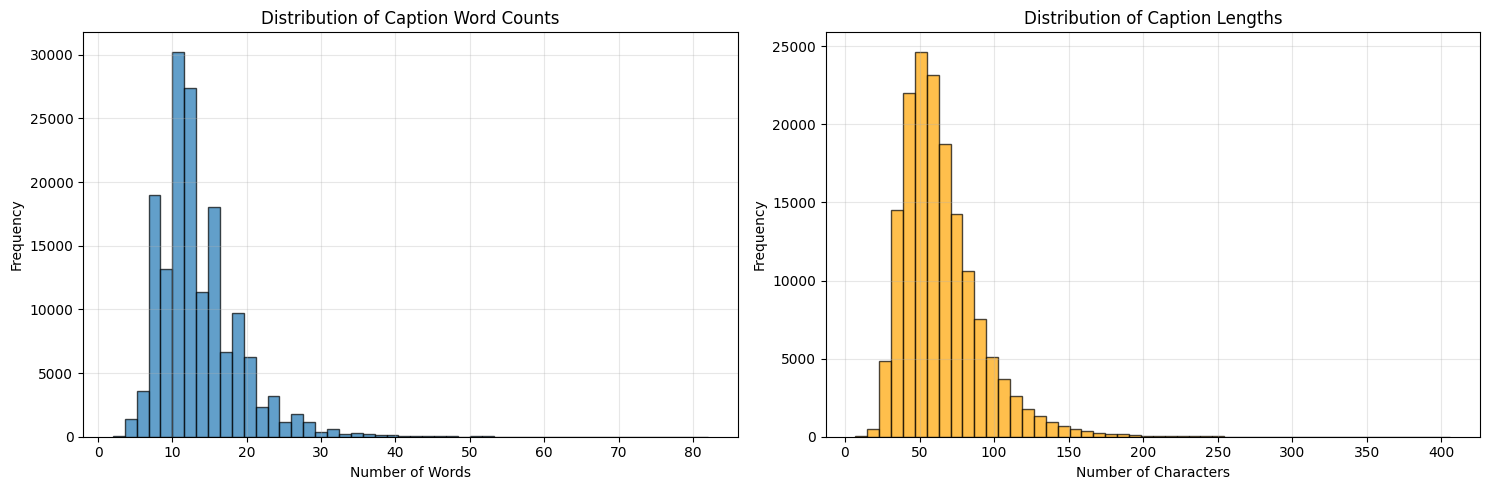

In [46]:
# Visualize caption statistics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Caption word count distribution
axes[0].hist(df['caption_word_count'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Caption Word Counts')
axes[0].grid(True, alpha=0.3)

# Caption character length distribution
axes[1].hist(df['caption_length'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Number of Characters')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Caption Lengths')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Utility Functions

In [47]:
def load_image(image_name):
    """Load an image from the images directory."""
    image_path = IMAGES_DIR / image_name
    if not image_path.exists():
        print(f"Warning: Image {image_name} not found at {image_path}")
        return None
    return Image.open(image_path)

def get_captions(image_name):
    """Get all captions for a given image."""
    return df[df['image_name'] == image_name]['caption'].tolist()

def display_image_with_captions(image_name, figsize=(10, 8)):
    """Display an image with all its captions."""
    # Load image
    img = load_image(image_name)
    if img is None:
        return
    
    # Get captions
    captions = get_captions(image_name)
    
    # Display
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image: {image_name}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print captions
    print(f"\nCaptions for {image_name}:")
    for i, caption in enumerate(captions, 1):
        print(f"{i}. {caption}")

print("Utility functions defined successfully!")

Utility functions defined successfully!


## 7. Sample Random Images with Captions

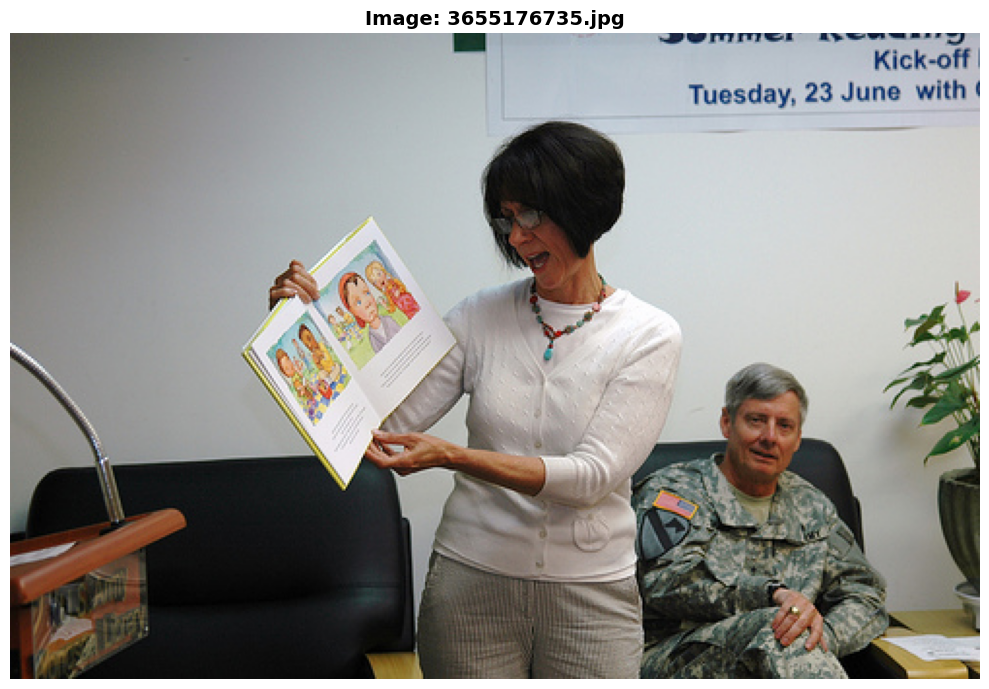


Captions for 3655176735.jpg:
1. AN older woman appears to read from a children 's book in an indoor setting , while a seated gentleman in a service uniform looks on .
2. A woman with short black hair and a colorful necklace reads a children 's illustration book .
3. A woman with a white shirt holding a children book .
4. A woman reading a children 's book .
5. A lady reading a story book .



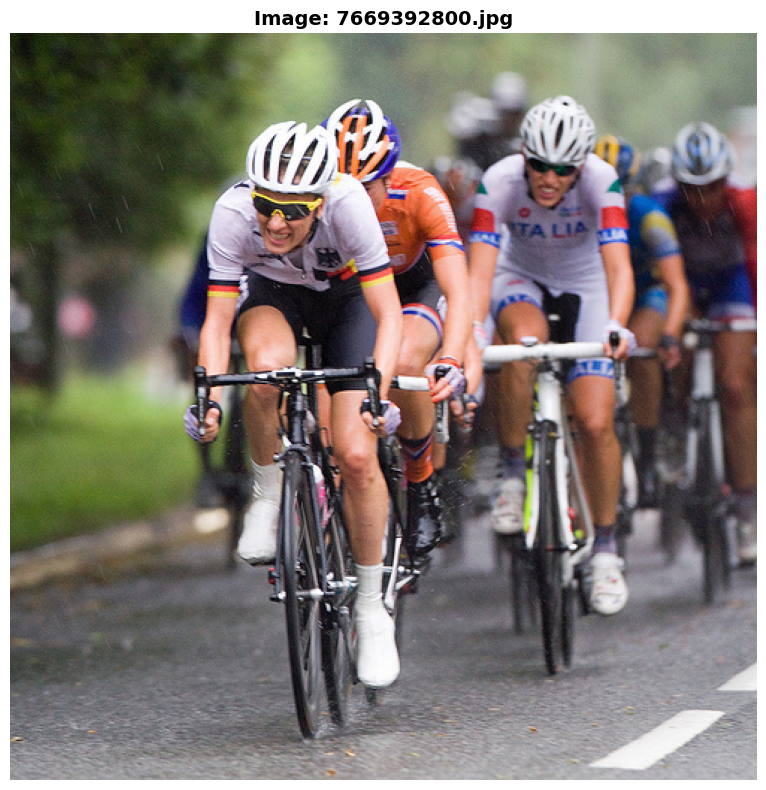


Captions for 7669392800.jpg:
1. Numerous bicyclists wearing bicyclist apparel , helmets , goggles , and gloves racing fiercely down a paved road despite the rain .
2. The bike leader pedals for his life as competing countries gain his tail .
3. A German man leads a street bike race followed closely by competitors .
4. A group of bicyclists are riding down a road in the rain .
5. These men are riding their bikes .



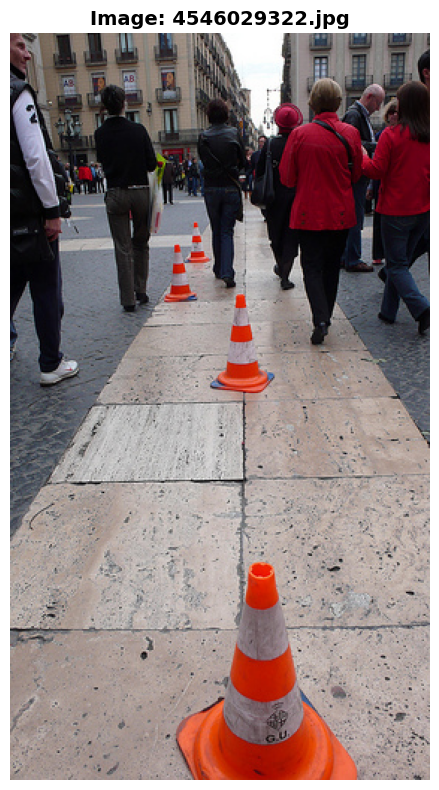


Captions for 4546029322.jpg:
1. In this picture we see multiple people crossing a courtyard with a line of traffic cones dissecting it .
2. A group of men and women avoid orange cones as they explore an open town square area .
3. A crowd of variously attired people is walking along a line of orange traffic cones .
4. Orange and white hazard cones are resting on street tiles .
5. A group of people walking away from the photographer .



In [48]:
def display_random_samples(n_samples=3, seed=42):
    """Display random sample images with their captions."""
    np.random.seed(seed)
    unique_images = df['image_name'].unique()
    
    # Check if images directory has files
    if not IMAGES_DIR.exists() or not any(IMAGES_DIR.iterdir()):
        print(f"Warning: No images found in {IMAGES_DIR}")
        print("Download images first to view them!")
        # Show captions only
        sample_images = np.random.choice(unique_images, size=min(n_samples, len(unique_images)), replace=False)
        for image_name in sample_images:
            print(f"\n{'='*80}")
            print(f"Image: {image_name}")
            captions = get_captions(image_name)
            for i, caption in enumerate(captions, 1):
                print(f"  {i}. {caption}")
        return
    
    # Sample random images
    sample_images = np.random.choice(unique_images, size=min(n_samples, len(unique_images)), replace=False)
    
    for image_name in sample_images:
        display_image_with_captions(image_name)
        print()

# Display samples (will show captions only if images not downloaded yet)
display_random_samples(n_samples=3)

## 8. Analyze Caption Diversity

In [49]:
# Analyze caption diversity
unique_captions = df['caption'].nunique()
total_captions = len(df)
duplicate_ratio = 1 - (unique_captions / total_captions)

print(f"Total captions: {total_captions:,}")
print(f"Unique captions: {unique_captions:,}")
print(f"Duplicate ratio: {duplicate_ratio:.4f} ({duplicate_ratio*100:.2f}%)")

# Find most common captions
print("\nTop 10 Most Common Captions:")
caption_counts = df['caption'].value_counts().head(10)
for caption, count in caption_counts.items():
    print(f"  [{count}x] {caption[:80]}{'...' if len(caption) > 80 else ''}")

Total captions: 158,915
Unique captions: 158,438
Duplicate ratio: 0.0030 (0.30%)

Top 10 Most Common Captions:
  [7x] Two dogs playing in the snow .
  [6x] A band is performing on stage .
  [6x] A dog swimming with a stick in its mouth .
  [6x] A person on a bmx bike .
  [6x] A dog runs through the grass .
  [6x] two dogs play together .
  [5x] A small image used to signify a broken web image link
  [5x] A man is singing into a microphone .
  [5x] Two dogs play in the grass .
  [5x] Two dogs run through a field .


## 9. Search Captions by Keyword

In [50]:
def search_captions(keyword, case_sensitive=False, max_results=10):
    """Search for captions containing a keyword."""
    if case_sensitive:
        mask = df['caption'].str.contains(keyword, na=False)
    else:
        mask = df['caption'].str.contains(keyword, case=False, na=False)
    
    results = df[mask]
    
    print(f"Found {len(results)} captions containing '{keyword}'")
    print(f"\nShowing first {min(max_results, len(results))} results:\n")
    
    for idx, (_, row) in enumerate(results.head(max_results).iterrows(), 1):
        print(f"{idx}. Image: {row['image_name']}")
        print(f"   Caption: {row['caption']}\n")
    
    return results

# Example search
results = search_captions("dog", max_results=5)

Found 10704 captions containing 'dog'

Showing first 5 results:

1. Image: 1001773457.jpg
   Caption: A black dog and a white dog with brown spots are staring at each other in the street .

2. Image: 1001773457.jpg
   Caption: A black dog and a tri-colored dog playing with each other on the road .

3. Image: 1001773457.jpg
   Caption: Two dogs of different breeds looking at each other on the road .

4. Image: 1001773457.jpg
   Caption: Two dogs on pavement moving toward each other .

5. Image: 1001773457.jpg
   Caption: A black dog and a spotted dog are fighting



## 10. Next Steps

This notebook provides basic exploration of the Flickr30K dataset. Here are some next steps:

1. **Feature Extraction**: Extract visual features from images using pre-trained models (ResNet, CLIP, etc.)
2. **Text Embedding**: Create embeddings for captions using transformers (BERT, sentence-transformers)
3. **Hybrid Retrieval**: Combine visual and textual features for multimodal search
4. **Evaluation**: Implement retrieval metrics (Recall@K, MRR, etc.)
5. **Model Training**: Fine-tune models for better cross-modal alignment